<a href="https://colab.research.google.com/github/Gaabiin5/Hugging_Face_Formation/blob/main/tools.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building Agents That Use Code

This notebook is part of the [Hugging Face Agents Course](https://www.hf.co/learn/agents-course), a free Course from beginner to expert, where you learn to build Agents.

![Agents course share](https://huggingface.co/datasets/agents-course/course-images/resolve/main/en/communication/share.png)

## Let's install the dependencies and login to our HF account to access the Inference API

If you haven't installed `smolagents` yet, you can do so by running the following command:

In [ ]:
!pip install smolagents

Let's also login to the Hugging Face Hub to have access to the Inference API.

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

In [1]:
from smolagents import ToolCallingAgent, DuckDuckGoSearchTool, InferenceClientModel, LiteLLMModel

model = LiteLLMModel(
        # model_id="ollama_chat/deepseek-coder:6.7b-instruct",  # Or try other Ollama-supported models
        # model_id="ollama_chat/phi4-mini",
        model_id="ollama_chat/openchat",
        api_base="http://127.0.0.1:11434",  # Default Ollama local server
        num_ctx=8192,
        # temperature=0.2,  # rLess creativity
        # max_tokens=512,   # Limit the lenght of the response
        system_message="""You are an intelligent assistant. 
                Only use a tool if needed to answer the user's query. 
                Once you have the information you need, respond directly to the user.
                Do not try to search more than 3 times for similar things.
                Do not repeat tool calls unnecessarily. Output a final answer in plain text."""
)

## The `@tool` Decorator  

### Generating a tool that retrieves the highest-rated catering

Let's imagine that Alfred has already decided on the menu for the party, but now he needs help preparing food for such a large number of guests. To do so, he would like to hire a catering service and needs to identify the highest-rated options available. Alfred can leverage a tool to search for the best catering services in his area.

Below is an example of how Alfred can use the `@tool` decorator to make this happen:

In [ ]:
from smolagents import CodeAgent, InferenceClientModel, tool

# Let's pretend we have a function that fetches the highest-rated catering services.
@tool
def catering_service_tool(query: str) -> str:
    """
    This tool returns the highest-rated catering service in Gotham City.

    Args:
        query: A search term for finding catering services.
    """
    # Example list of catering services and their ratings
    services = {
        "Gotham Catering Co.": 4.9,
        "Wayne Manor Catering": 4.8,
        "Gotham City Events": 4.7,
    }

    # Find the highest rated catering service (simulating search query filtering)
    best_service = max(services, key=services.get)

    return best_service


agent = CodeAgent(tools=[catering_service_tool], model=model)

# Run the agent to find the best catering service
result = agent.run(
    "Can you give me the name of the highest-rated catering service in Gotham City?"
)

print(result)

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Can you give me the name of the highest-rated catering service in Gotham City?                                  │
│                                                                                                                 │
╰─ LiteLLMModel - ollama_chat/openchat ───────────────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

/home/gan/venv/lib/python3.12/site-packages/pydantic/main.py:463: UserWarning: Pydantic serializer warnings:
  PydanticSerializationUnexpectedValue(Expected 9 fields but got 5: Expected `Message` - serialized value may not be as expected [input_value=Message(content=' Thought...er_specific_fields=None), input_type=Message])
  PydanticSerializationUnexpectedValue(Expected `StreamingChoices` - serialized value may not be as expected [input_value=Choices(finish_reason='st...r_specific_fields=None)), input_type=Choices])
  return self.__pydantic_serializer__.to_python(


─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  highest_rated_catering = catering_service_tool(query="Gotham City")                                              
  print("Highest-rated catering service:", highest_rated_catering)                                                 
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
Highest-rated catering service: Gotham Catering Co.

Out: None

[Step 1: Duration 7.27 seconds| Input tokens: 2,483 | Output tokens: 94]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

/home/gan/venv/lib/python3.12/site-packages/pydantic/main.py:463: UserWarning: Pydantic serializer warnings:
  PydanticSerializationUnexpectedValue(Expected 9 fields but got 5: Expected `Message` - serialized value may not be as expected [input_value=Message(content='Thought:...er_specific_fields=None), input_type=Message])
  PydanticSerializationUnexpectedValue(Expected `StreamingChoices` - serialized value may not be as expected [input_value=Choices(finish_reason='st...r_specific_fields=None)), input_type=Choices])
  return self.__pydantic_serializer__.to_python(


─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  final_answer(highest_rated_catering)                                                                             
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: Gotham Catering Co.

[Step 2: Duration 2.58 seconds| Input tokens: 5,196 | Output tokens: 172]

Gotham Catering Co.


/home/gan/venv/lib/python3.12/site-packages/pydantic/main.py:463: UserWarning: Pydantic serializer warnings:
  PydanticSerializationUnexpectedValue(Expected 9 fields but got 5: Expected `Message` - serialized value may not be as expected [input_value=Message(content=' Thought...er_specific_fields=None), input_type=Message])
  PydanticSerializationUnexpectedValue(Expected `StreamingChoices` - serialized value may not be as expected [input_value=Choices(finish_reason='st...r_specific_fields=None)), input_type=Choices])
  return self.__pydantic_serializer__.to_python(
/home/gan/venv/lib/python3.12/site-packages/pydantic/main.py:463: UserWarning: Pydantic serializer warnings:
  PydanticSerializationUnexpectedValue(Expected 9 fields but got 5: Expected `Message` - serialized value may not be as expected [input_value=Message(content=' Thought...er_specific_fields=None), input_type=Message])
  PydanticSerializationUnexpectedValue(Expected `StreamingChoices` - serialized value may not be as ex

## Defining a Tool as a Python Class  

### Generating a tool to generate ideas about the superhero-themed party

Alfred's party at the mansion is a **superhero-themed event**, but he needs some creative ideas to make it truly special. As a fantastic host, he wants to surprise the guests with a unique theme.

To do this, he can use an agent that generates superhero-themed party ideas based on a given category. This way, Alfred can find the perfect party theme to wow his guests.

In [3]:
from smolagents import Tool, CodeAgent, InferenceClientModel

class SuperheroPartyThemeTool(Tool):
    name = "superhero_party_theme_generator"
    description = """
    This tool suggests creative superhero-themed party ideas based on a category.
    It returns a unique party theme idea."""

    inputs = {
        "category": {
            "type": "string",
            "description": "The type of superhero party (e.g., 'classic heroes', 'villain masquerade', 'futuristic Gotham').",
        }
    }

    output_type = "string"

    def forward(self, category: str):
        themes = {
            "classic heroes": "Justice League Gala: Guests come dressed as their favorite DC heroes with themed cocktails like 'The Kryptonite Punch'.",
            "villain masquerade": "Gotham Rogues' Ball: A mysterious masquerade where guests dress as classic Batman villains.",
            "futuristic Gotham": "Neo-Gotham Night: A cyberpunk-style party inspired by Batman Beyond, with neon decorations and futuristic gadgets."
        }

        return themes.get(category.lower(), "Themed party idea not found. Try 'classic heroes', 'villain masquerade', or 'futuristic Gotham'.")

# Instantiate the tool
party_theme_tool = SuperheroPartyThemeTool()
agent = CodeAgent(tools=[party_theme_tool], model=model)

# Run the agent to generate a party theme idea
result = agent.run(
    "What would be a good superhero party idea for a 'villain masquerade' theme?"
)

print(result)

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ What would be a good superhero party idea for a 'villain masquerade' theme?                                     │
│                                                                                                                 │
╰─ LiteLLMModel - ollama_chat/openchat ───────────────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  def superhero_party_theme_generator(category: str) -> str:                                                       
      """                                                                                                          
      This tool suggests creative superhero-themed party ideas based on a category.                                
      It returns a unique party theme idea.                                                                        
                                                                                                                   
      Args:                                                                                                        
          category: The type of superhero party (e.g., 'classic heroes', 'villain masquerade', 'futuristic         
  Gotham').                                                                                                        
      """                                                                                                          
      # Here the implementation of the tool would be.                                                              
      pass                                                                                                         
                                                                                                                   
  theme = superhero_party_theme_generator(category="villain masquerade")                                           
  final_answer(theme)                                                                                              
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: Gotham Rogues' Ball: A mysterious masquerade where guests dress as classic Batman villains.

[Step 1: Duration 5.69 seconds| Input tokens: 2,522 | Output tokens: 185]

Gotham Rogues' Ball: A mysterious masquerade where guests dress as classic Batman villains.


## Sharing a Tool to the Hub

Sharing your custom tool with the community is easy! Simply upload it to your Hugging Face account using the `push_to_hub()` method.

For instance, Alfred can share his `catering_service_tool` to help others find the best catering services in Gotham. Here's how to do it:

In [8]:
import os
token = os.getenv("HF_TOKEN")

party_theme_tool.push_to_hub("Gaabin/catering_service_tool", token=token)

README.md:   0%|          | 0.00/242 [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/spaces/Gaabin/catering_service_tool/commit/d51b1b4f2c32d05a50d3b0d97f9fe358bff20a63', commit_message='Upload tool', commit_description='', oid='d51b1b4f2c32d05a50d3b0d97f9fe358bff20a63', pr_url=None, repo_url=RepoUrl('https://huggingface.co/spaces/Gaabin/catering_service_tool', endpoint='https://huggingface.co', repo_type='space', repo_id='Gaabin/catering_service_tool'), pr_revision=None, pr_num=None)

## Importing a Tool from the Hub

You can easily import tools created by other users using the `load_tool()` function. For example, Alfred might want to generate a promotional image for the party using AI. Instead of building a tool from scratch, he can leverage a predefined one from the community:

In [10]:
from smolagents import load_tool, CodeAgent, InferenceClientModel

image_generation_tool = load_tool(
    "m-ric/text-to-image",
    trust_remote_code=True
)

agent = CodeAgent(
    tools=[image_generation_tool],
    model=model
)

agent.run("Generate an image of a luxurious superhero-themed party at Wayne Manor with made-up superheros.")

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Generate an image of a luxurious superhero-themed party at Wayne Manor with made-up superheros.                 │
│                                                                                                                 │
╰─ LiteLLMModel - ollama_chat/openchat ───────────────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  # First, we should create the imaginary superheroes                                                              
  imaginary_superheroes = [                                                                                        
      {"name": "Aquagirl", "description": "A young woman with long blond hair and a green outfit who can control   
  water."},                                                                                                        
      {"name": "Lightning Boy", "description": "A teenage boy with short brown hair, wearing a red suit that       
  gives him the ability to create lightning."},                                                                    
      {"name": "Glacier Girl", "description": "An Asian girl with long black hair and a blue outfit, who can       
  control ice and snow."}                                                                                          
                                                                                                                   
  ]                                                                                                                
                                                                                                                   
  # Next, generate an image combining the luxurious party and the superheroes                                      
  image = image_generator(f"A luxurious superhero-themed party at Wayne Manor with {', '.join([superhero['name']   
  for superhero in imaginary_superheroes])}")                                                                      
  final_answer(image)                                                                                              
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Code execution failed at line 'image = image_generator(f"A luxurious superhero-themed party at Wayne Manor with {',
'.join([superhero['name'\] for superhero in imaginary_superheroes])}")' due to: HfHubHTTPError: 402 Client Error: 
Payment Required for url: https://router.huggingface.co/together/v1/images/generations (Request ID: 
Root=1-6852ca48-15c242ce32c35f580e8eb7b9;3f65036f-2276-4d36-bd94-d55f21763b85)

You have exceeded your monthly included credits for Inference Providers. Subscribe to PRO to get 20x more monthly 
included credits.

[Step 1: Duration 11.28 seconds| Input tokens: 2,513 | Output tokens: 251]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  # We will create a new description of the luxurious superhero-themed party at Wayne Manor                        
  party_description = "A luxurious superhero-themed party at Wayne Manor filled with decorations, music, and       
  guests dressed as their favorite superheroes."                                                                   
                                                                                                                   
  # Now we use this description to generate an image using the image_generator function                            
  image = image_generator(f"{party_description}")                                                                  
  final_answer(image)                                                                                              
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Code execution failed at line 'image = image_generator(f"{party_description}")' due to: HfHubHTTPError: 402 Client 
Error: Payment Required for url: https://router.huggingface.co/together/v1/images/generations (Request ID: 
Root=1-6852ca4e-60bc6492070a13de340f05a4;7b19f32a-ce0e-4565-83db-a7e6a1c6c2a1)

You have exceeded your monthly included credits for Inference Providers. Subscribe to PRO to get 20x more monthly 
included credits.

[Step 2: Duration 5.70 seconds| Input tokens: 5,774 | Output tokens: 403]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 3 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  # Create a detailed description of the scene                                                                     
  description = "A luxurious superhero-themed party at Wayne Manor filled with decorations, music, and guests      
  dressed as their favorite superheroes. The main room is decorated in rich reds and golds, creating an            
  atmosphere of opulence and grandeur. A large dance floor occupies the center of the room, surrounded by tables   
  with crystal glassware and silverware."                                                                          
                                                                                                                   
  # Describe the imaginary superheroes present at the party                                                        
  superheroes = [                                                                                                  
      {"name": "Aquagirl", "description": "A young woman with long blond hair and a green outfit who can control   
  water."},                                                                                                        
      {"name": "Lightning Boy", "description": "A teenage boy with short brown hair, wearing a red suit that       
  gives him the ability to create lightning."},                                                                    
      {"name": "Glacier Girl", "description": "An Asian girl with long black hair and a blue outfit, who can       
  control ice and snow."}                                                                                          
  ]                                                                                                                
                                                                                                                   
  # Use the description and the list of superheroes to create an image in our mind and finalize the answer using   
  the final_answer function                                                                                        
  final_answer(f"{description}\nGuests: {', '.join([superhero['name'] for superhero in superheroes])}")            
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: A luxurious superhero-themed party at Wayne Manor filled with decorations, music, and guests 
dressed as their favorite superheroes. The main room is decorated in rich reds and golds, creating an atmosphere of
opulence and grandeur. A large dance floor occupies the center of the room, surrounded by tables with crystal 
glassware and silverware.
Guests: Aquagirl, Lightning Boy, Glacier Girl

[Step 3: Duration 12.02 seconds| Input tokens: 9,550 | Output tokens: 761]

'A luxurious superhero-themed party at Wayne Manor filled with decorations, music, and guests dressed as their favorite superheroes. The main room is decorated in rich reds and golds, creating an atmosphere of opulence and grandeur. A large dance floor occupies the center of the room, surrounded by tables with crystal glassware and silverware.\nGuests: Aquagirl, Lightning Boy, Glacier Girl'

**Observations**

Here the image generator is provided by Hugging face with limited credits. So it's normal to not see the image as I have not pay to see it but we can verify that the tool call was good.


## Importing a Hugging Face Space as a Tool

You can also import a HF Space as a tool using `Tool.from_space()`. This opens up possibilities for integrating with thousands of spaces from the community for tasks from image generation to data analysis.

The tool will connect with the spaces Gradio backend using the `gradio_client`, so make sure to install it via `pip` if you don't have it already. For the party, Alfred can also use a HF Space directly for the generation of the previous annoucement AI-generated image. Let's build it!

In [11]:
!pip install gradio_client

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.6/323.6 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.5/182.5 kB 12.7 MB/s eta 0:00:00


In [14]:
!pip install matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.6/106.6 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 52.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.7/323.7 kB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 65.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 59.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.1/111.1 kB 16.3 MB/s eta 0:00:00


In [12]:
from smolagents import CodeAgent, InferenceClientModel, Tool

image_generation_tool = Tool.from_space(
    "black-forest-labs/FLUX.1-schnell",
    name="image_generator",
    description="Generate an image from a prompt"
)

# model = InferenceClientModel("Qwen/Qwen2.5-Coder-32B-Instruct")

agent = CodeAgent(tools=[image_generation_tool], model=model)

agent.run(
    "Improve this prompt, then generate an image of it.",
    additional_args={'user_prompt': 'A grand superhero-themed party at Wayne Manor, with Alfred overseeing a luxurious gala'}
)

Loaded as API: https://black-forest-labs-flux-1-schnell.hf.space ✔


Since `api_name` was not defined, it was automatically set to the first available API: `/infer`.


╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Improve this prompt, then generate an image of it.                                                              │
│ You have been provided with these additional arguments, that you can access using the keys as variables in your │
│ python code:                                                                                                    │
│ {'user_prompt': 'A grand superhero-themed party at Wayne Manor, with Alfred overseeing a luxurious gala'}.      │
│                                                                                                                 │
╰─ LiteLLMModel - ollama_chat/openchat ───────────────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  # Improve the user prompt                                                                                        
  improved_prompt = "A luxurious superhero-themed party at Wayne Manor with Alfred overseeing the gala."           
                                                                                                                   
  # Generate an image based on the improved prompt                                                                 
  image = image_generator(prompt=improved_prompt)                                                                  
  final_answer(image)                                                                                              
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: /tmp/gradio/2ad5dca7ded81c85ce5d779b6b83c3c1a9feb1e3a2f2a48e3716ea12ca232150/image.webp

[Step 1: Duration 8.18 seconds| Input tokens: 2,513 | Output tokens: 133]

'/tmp/gradio/2ad5dca7ded81c85ce5d779b6b83c3c1a9feb1e3a2f2a48e3716ea12ca232150/image.webp'

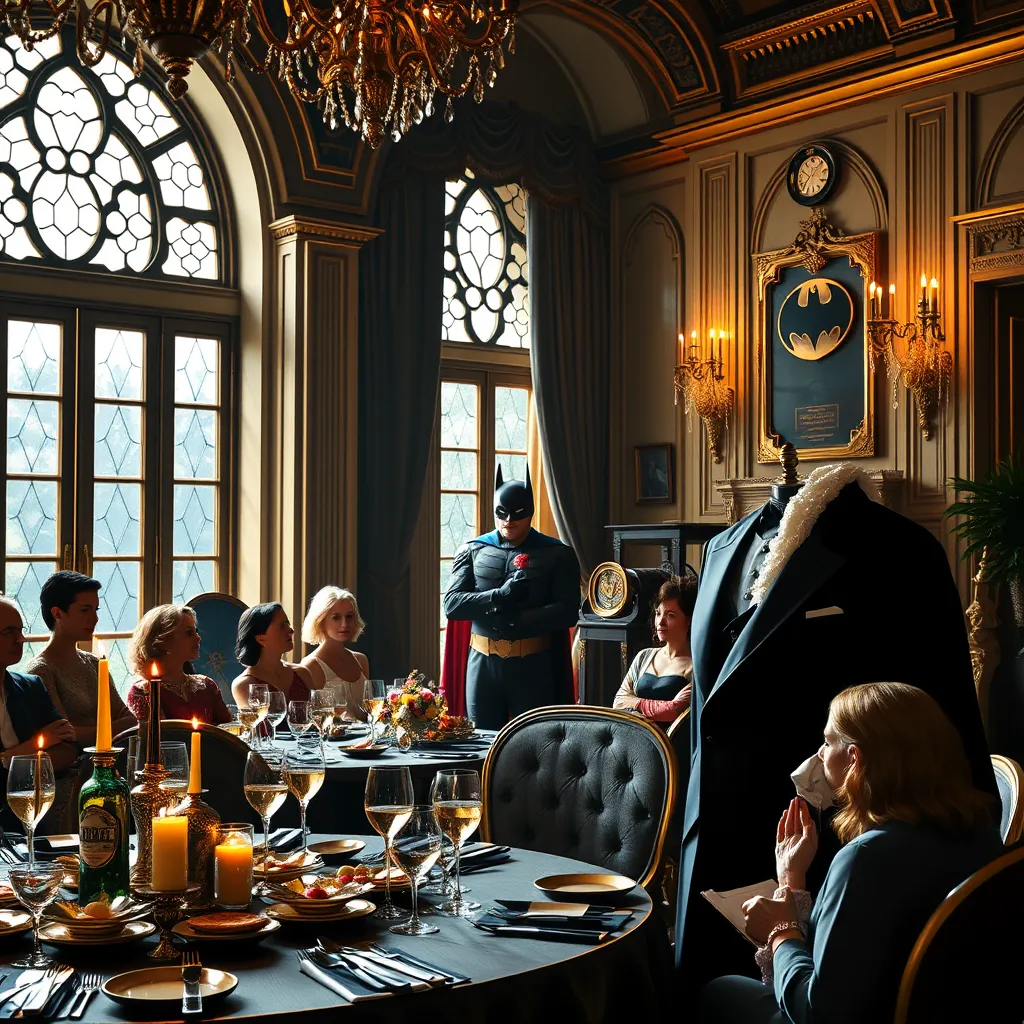

In [16]:
from PIL import Image as PILImage
import matplotlib.pyplot as plt

image_path = '/tmp/gradio/2ad5dca7ded81c85ce5d779b6b83c3c1a9feb1e3a2f2a48e3716ea12ca232150/image.webp'

img = PILImage.open(image_path)
img

## Importing a LangChain Tool

These tools need a [SerpApi API Key](https://serpapi.com/).

You can easily load LangChain tools using the `Tool.from_langchain()` method. Alfred, ever the perfectionist, is preparing for a spectacular superhero night at Wayne Manor while the Waynes are away. To make sure every detail exceeds expectations, he taps into LangChain tools to find top-tier entertainment ideas.

By using `Tool.from_langchain()`, Alfred effortlessly adds advanced search functionalities to his smolagent, enabling him to discover exclusive party ideas and services with just a few commands.

Here's how he does it:

In [17]:
!pip install langchain-community google-search-results

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 31.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 40.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.1/438.1 kB 34.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.0/363.0 kB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 54.8 MB/s 

In [21]:

import os 
from dotenv import load_dotenv

load_dotenv()

serpapi_api_key = os.getenv("SERPAPI_API_KEY")

print(serpapi_api_key)

#os.environ["SERPAPI_API_KEY"] = userdata.get('SERPAPI_API_KEY')

None


In [19]:
from langchain.agents import load_tools
from smolagents import CodeAgent, InferenceClientModel, Tool

search_tool = Tool.from_langchain(load_tools(["serpapi"],serpapi_api_key=serpapi_api_key))

agent = CodeAgent(tools=[search_tool], model=model)

agent.run("Search for luxury entertainment ideas for a superhero-themed event, such as live performances and interactive experiences.")

ValidationError: 1 validation error for SerpAPIWrapper
  Value error, Did not find serpapi_api_key, please add an environment variable `SERPAPI_API_KEY` which contains it, or pass `serpapi_api_key` as a named parameter. [type=value_error, input_value={'serpapi_api_key': None}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.11/v/value_error

With this setup, Alfred can quickly discover luxurious entertainment options, ensuring Gotham's elite guests have an unforgettable experience. This tool helps him curate the perfect superhero-themed event for Wayne Manor! 🎉